In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [38]:
dataset = pd.read_csv("../Housing.csv")
X_train = dataset.iloc[:, 1:5].values
y_train = dataset.iloc[:, 0].values
y_train = y_train / (10**7)
print(dataset.iloc[:, 1:5])
print(dataset.iloc[:, 0])
print()
X_features=["area", "bedroom", "bathroom", "stories"]

     area  bedrooms  bathrooms  stories
0    7420         4          2        3
1    8960         4          4        4
2    9960         3          2        2
3    7500         4          2        2
4    7420         4          1        2
..    ...       ...        ...      ...
540  3000         2          1        1
541  2400         3          1        1
542  3620         2          1        1
543  2910         3          1        1
544  3850         3          1        2

[545 rows x 4 columns]
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64



In [39]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [40]:
def display_data_plot(x, y, ax, features):
    for i in range(x.shape[1]):
        ax[i].scatter(x[:,i], y)
        ax[i].set_xlabel(features[i])
    ax[0].set_ylabel("price")

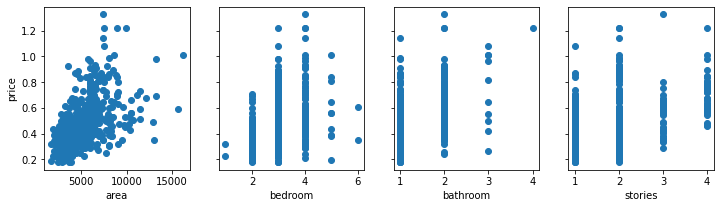

In [41]:
fig,ax = plt.subplots(1,4, figsize=(12, 3), sharey=True)
display_data_plot(X_train, y_train, ax, X_features)

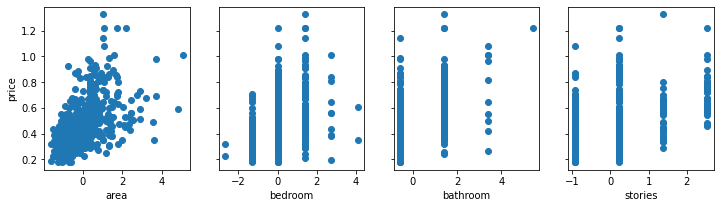

In [42]:
X_norm, X_mu, X_sigma = z_score_normalization(X_train)
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
display_data_plot(X_norm, y_train, ax, X_features)

In [43]:
def compute_cost(x, y, w, b):
    m, n = x.shape
    j_wb = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        j_wb += (f_wb - y[i]) ** 2
    return j_wb / (2 * m)

In [44]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    return dj_dw / m, dj_db / m

In [45]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost , compute_gradient):
    m , n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
        
        if i % math.ceil(num_iter/10) == 0:
            print(f"Iteration {i} \t Cost: {j_hist[-1]}")
    return w, b, j_hist

In [46]:
w_in = np.zeros(X_train.shape[1])
b_in = 0
alpha = 0.01
num_iter = 1000

w, b, j_hist = gradient_descent(X_norm, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)
print(w, b)

Iteration 0 	 Cost: 0.1285083606354134
Iteration 100 	 Cost: 0.023553977554381267
Iteration 200 	 Cost: 0.010180375084566677
Iteration 300 	 Cost: 0.00839208034701692
Iteration 400 	 Cost: 0.008148587255826905
Iteration 500 	 Cost: 0.008114683142887526
Iteration 600 	 Cost: 0.008109748760150245
Iteration 700 	 Cost: 0.008108966979261842
Iteration 800 	 Cost: 0.008108824837908526
Iteration 900 	 Cost: 0.008108794163423047
[0.08238484 0.01470148 0.06022646 0.04601774] 0.4766523462058731


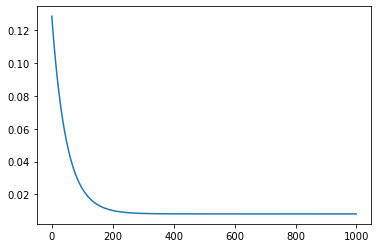

In [47]:
plt.plot(j_hist)
plt.show()

1.33
0.7325721715011766


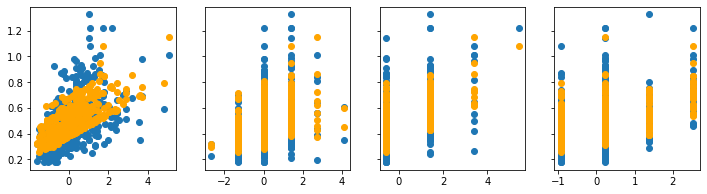

In [48]:
m, n = X_train.shape
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = np.dot(X_norm[i], w) + b
print(y_train[0])
print(y_pred[0])
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
#display_data_plot(X_norm, y_train, ax, X_features)

for i in range(len(ax)):
    ax[i].scatter(X_norm[:, i], y_train)
    ax[i].scatter(X_norm[:, i], y_pred, c='orange')

In [49]:
1.33e-07

1.33e-07